# EDA on Football Data

Data Source : https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

<b> About data : </b>
> results.csv includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- home_score - full-time home team score including extra time, not including penalty-shootouts
- away_score - full-time away team score including extra time, not including penalty-shootouts
- tournament - the name of the tournament
- city - the name of the city/town/administrative unit where the match was played
- country - the name of the country where the match was played
- neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

> shootouts.csv 
 
Winners of matches that went to a penalty-shootout

includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- winner - winner of the penalty-shootout

In [1]:
project_name = "football-data-analysis"

# import essential libraries for analysis and visualisations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


#### Download the data set from kaggle 
Mutiple ways to get the dataset 
- using requests module 
- opendatasets 
- using urlretrieve from urllib.request

In [ ]:
# Data collection 

dataset_url = 'https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017'
    
import opendatasets as od
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

In [2]:
import os 
# os.rename('international-football-results-from-1872-to-2017','football_data')
os.listdir(".")

['.ipynb_checkpoints', 'football_data', 'football_eda.ipynb']

In [5]:
# read the data into dataframes 
result_df = pd.read_csv("./football_data/results.csv")
shootout_df = pd.read_csv("./football_data/shootouts.csv")


###### Explore more information about the data  (Analysis)

- Size of the data set
- Columns in the data set 
- descriptive stats
- As there is data column, Time frame of data 
- nulls or NAs ?



In [6]:
print(f"""Results data set has:
      rows: {result_df.shape[0]}  
      cols: {result_df.shape[1]} \n """, end="\n")

print(f"""Shootout data set has:
      rows: {shootout_df.shape[0]}  
      cols: {shootout_df.shape[1]} """, end="\n\n")

print("result_df: \n", result_df.head(), end="\n\n")
print("shootout_df: \n", shootout_df.head(), end="\n")




Results data set has:
      rows: 43086  
      cols: 9 
 
Shootout data set has:
      rows: 444  
      cols: 4 

result_df: 
          date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country neutral  
0  Scotland   False  
1   England   False  
2  Scotland   False  
3   England   False  
4  Scotland   False  

shootout_df: 
          date    home_team         away_team       winner
0  1967-08-22        India            Taiwan       Taiwan
1  1971-11-14  South Korea  Vietnam Republic  South Korea
2  1972-05-17     Thailand       South Korea  South Korea
3  1

In [7]:
# Explore Datatypes of the resultsdf

result_df.dtypes

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral        object
dtype: object

In [8]:
# Date column needs to be date object of python 

result_df.date = pd.to_datetime(result_df.date)
result_df.neutral = result_df['neutral'].astype(bool)

print(result_df.dtypes, end="\n\n")

print('We are dealing with {} rows of data and {} columns'.format(result_df.shape[0], result_df.shape[1]))

date          datetime64[ns]
home_team             object
away_team             object
home_score           float64
away_score           float64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

We are dealing with 43086 rows of data and 9 columns


In [9]:
result_df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,43081.0,1.743228,1.753982,0.0,1.0,1.0,2.0,31.0
away_score,43081.0,1.183608,1.400620,0.0,0.0,1.0,2.0,21.0


In [10]:
#Time frame
print("The data records goes back to {} and up to {} \n".format(result_df.date.min(), result_df.date.max()))

# print(( result_df.date.max() - result_df.date.min())/365)
print("The time frame is {} years".format(round((result_df.date.max() - result_df.date.min()) / np.timedelta64(1, 'Y')), 2))


The data records goes back to 1872-11-30 00:00:00 and up to 2021-12-18 00:00:00 

The time frame is 149 years


In [11]:
# get nulls 
result_df.isna().sum()


date          0
home_team     2
away_team     2
home_score    5
away_score    5
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [12]:
result_df[result_df['home_team'].isna()]
# print(result_df[result_df['away_team'].isna()])


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43083,2021-12-18,NaN,NaN,NaN,NaN,Arab Cup,Doha,Qatar,True
43084,2021-12-18,NaN,NaN,NaN,NaN,Arab Cup,Al Khor,Qatar,True


In [13]:
result_df[result_df['home_score'].isna()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43081,2021-12-15,Tunisia,Egypt,NaN,NaN,Arab Cup,Doha,Qatar,True
43082,2021-12-15,Qatar,Algeria,NaN,NaN,Arab Cup,Doha,Qatar,False
43083,2021-12-18,NaN,NaN,NaN,NaN,Arab Cup,Doha,Qatar,True
43084,2021-12-18,NaN,NaN,NaN,NaN,Arab Cup,Al Khor,Qatar,True
43085,2021-12-18,United States,Bosnia and Herzegovina,NaN,NaN,Friendly,Los Angeles,United States,False


In [15]:
#Any nulls?, lets drop NA's for now
result_df = result_df.dropna() # NO
result_df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

## Data Analysis on games played in home ground 

In our data set we have 75% of games played in home ground
and next 25% of matches were played in Neutal venue

- step1 will be analyse the data set for non neutal venue
- later analyse the data set for neutral venue

In [16]:
# Non Neutral, meaning played in home ground

mask_non_neutral = result_df.loc[result_df['neutral'] == False]
print(mask_non_neutral.shape)
mask_non_neutral.tail()

(32424, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43050,2021-11-30,Qatar,Bahrain,1.0,0.0,Arab Cup,Al Khor,Qatar,False
43058,2021-12-03,Qatar,Oman,2.0,1.0,Arab Cup,Al Rayyan,Qatar,False
43067,2021-12-06,Qatar,Iraq,3.0,0.0,Arab Cup,Al Khor,Qatar,False
43075,2021-12-09,Tanzania,Uganda,0.0,2.0,Friendly,Dar es Salaam,Tanzania,False
43077,2021-12-10,Qatar,United Arab Emirates,5.0,0.0,Arab Cup,Al Khor,Qatar,False


In [17]:
mask_non_neutral['home_team'].value_counts(), mask_non_neutral['away_team'].value_counts()

(England          464
 Sweden           461
 France           443
 Hungary          435
 Germany          429
                 ... 
 Madrid             1
 Cascadia           1
 Palau              1
 Micronesia         1
 Central Spain      1
 Name: home_team, Length: 265, dtype: int64,
 Sweden            472
 England           464
 Hungary           456
 Finland           404
 Germany           393
                  ... 
 Manchukuo           1
 Hitra               1
 County of Nice      1
 Asturias            1
 Central Spain       1
 Name: away_team, Length: 294, dtype: int64)

<AxesSubplot:>

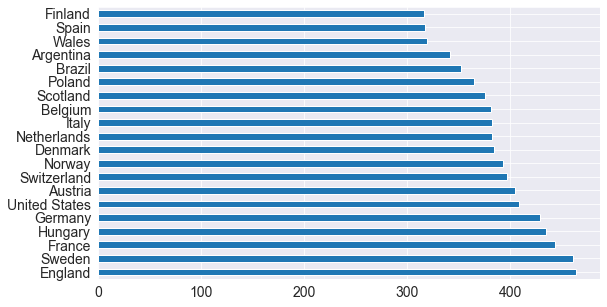

In [18]:
# Matches played in home ground of either team

mask_non_neutral['home_team'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

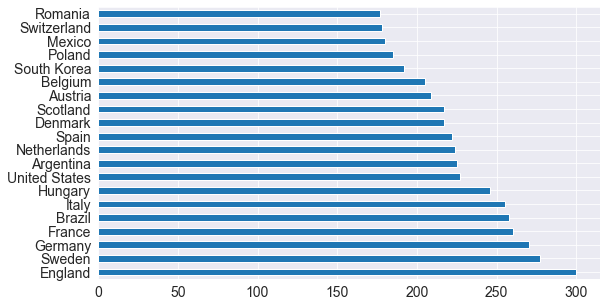

In [19]:
# seems like England has won most of the matches played in home ground. 
# 
import plotly.express as px

win_at_home = mask_non_neutral[mask_non_neutral['home_score'] > mask_non_neutral['away_score']]

win_at_home['home_team'].value_counts()[:20].plot(kind='barh')


<AxesSubplot:>

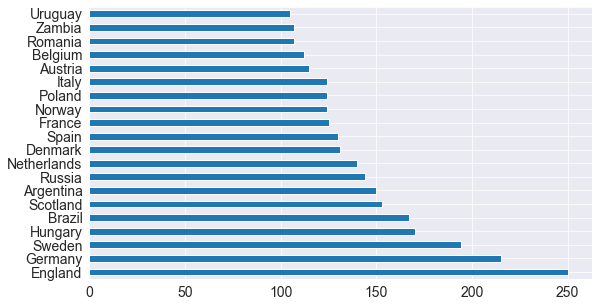

In [54]:
# seems like England has won most of the matches played
# How about in non home ground ?
# 
win_at_away = mask_non_neutral[mask_non_neutral['away_score'] > mask_non_neutral['home_score']]

win_at_away['away_team'].value_counts()[:20].plot(kind='barh')


In [57]:
# Show Top 20 games vs wins
# Lets look at top 20 games on IFL @ home ground

import plotly.graph_objects as go


new_df = pd.DataFrame({'games':mask_non_neutral['home_team'].value_counts(), 
                       'win': win_at_home['home_team'].value_counts(), 
                     'win_away': win_at_away['away_team'].value_counts() }).sort_values(by=['games'], ascending = False).head(n = 20)

fig = go.Figure(data=[
    go.Bar(name='games', x=new_df.index, y=new_df['games']),
    go.Bar(name='win', x=new_df.index, y=new_df['win']) ])

# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title = 'Games Played vs Won @Home ground')

fig.show()


# games played vs won in non home grounds
away_df = pd.DataFrame({'games':mask_non_neutral['away_team'].value_counts(), 
                       'win': win_at_away['away_team'].value_counts()}).sort_values(by=['games'], ascending = False).head(n = 20)

fig1 = go.Figure(data=[
    go.Bar(name='games', x=away_df.index, y=away_df['games']),
    go.Bar(name='win', x=away_df.index, y=away_df['win']) ])

# Change the bar mode
fig1.update_layout(barmode='group')
fig1.update_layout(title = 'Games Played vs Won @ Non Home Ground')

fig1.show()

### Conclusion 1:

From the above graphs we can conclude.
1. England 
2. Sweden
3. France 
4. Hungary
5. Germany 
6. United States 
7. Austria
8. Switzerland
9. Norway
10. Denmark

are top 10 most well played teams so far. 

### Total Games played and win ctriterion (Probablity of win)

Lets see %ge of win and teams who is really performing good


In [58]:
# result_df.loc[result_df['neutral'] == False, 'home_team'].sort_values( ascending = True)


fig = go.Figure(data=[
    go.Bar(name='games', x=new_df.index, y=new_df['win']/new_df['games'] )])

# Change the bar mode
fig.update_layout(title = 'Chances of winning game')

fig.show()

new_df['win']/new_df['games'] 


England          0.646552
Sweden           0.600868
France           0.586907
Hungary          0.565517
Germany          0.629371
United States    0.556373
Austria          0.517327
Switzerland      0.448363
Norway           0.414758
Denmark          0.565104
Italy            0.667539
Netherlands      0.586387
Belgium          0.538058
Scotland         0.578667
Poland           0.506849
Brazil           0.732955
Argentina        0.659824
Wales            0.385580
Spain            0.700315
Finland          0.325949
dtype: float64

### Conclusion 2:

Based on the analysis it seems like 
- Brazil is doing a good game being 0.732955 of winning @ home grounds
- followed by Spain who stand at ~70% of winning @ home ground
- Later trail followed by Italy at ~66%, England ~64%, Germany ~62%


### Focusing on number of Goals hit by teams

- There is a pattern on the number of games played by each team and win.
- Focusing on number of golas hit by these teams would give more patterns



In [60]:
# How are the teams doing in away groounds ?
# win_at_away['away_team'].value_counts().head(n = 10)

fig = go.Figure(data=[
    go.Bar(name='games', x=new_df.index, y=new_df['win_away']/new_df['games'] )])

# Change the bar mode
fig.update_layout(title = 'Chances of winning game @ Non home ground')

fig.show()

new_df['win_away']/new_df['games'] 

England          0.538793
Sweden           0.420824
France           0.282167
Hungary          0.390805
Germany          0.501166
United States    0.149510
Austria          0.284653
Switzerland      0.231738
Norway           0.315522
Denmark          0.341146
Italy            0.324607
Netherlands      0.366492
Belgium          0.293963
Scotland         0.408000
Poland           0.339726
Brazil           0.474432
Argentina        0.439883
Wales            0.269592
Spain            0.410095
Finland          0.250000
dtype: float64

### Conclusion 3:

Teams seems to be doing good but not as good in comparision with Home ground.
This pattern infers.,
- England is doing better with ~50% good in non home ground 
- Followed by Hungary with ~%50% of winning chances
- Brazil follows by ~%47, Argentina ~43%


In [50]:
#Focusing more on the Goals made in each game

# Looking at the df we are dealing with 
# result_df.loc[result_df['neutral'] == False].sort_values(by = ['home_team'], ascending = True)

mask_non_neutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43050,2021-11-30,Qatar,Bahrain,1.0,0.0,Arab Cup,Al Khor,Qatar,False
43058,2021-12-03,Qatar,Oman,2.0,1.0,Arab Cup,Al Rayyan,Qatar,False
43067,2021-12-06,Qatar,Iraq,3.0,0.0,Arab Cup,Al Khor,Qatar,False
43075,2021-12-09,Tanzania,Uganda,0.0,2.0,Friendly,Dar es Salaam,Tanzania,False


             home_score  away_score  neutral
home_team                                   
England           964.0       160.0        0
Germany           937.0       167.0        0
Sweden            920.0       189.0        0
Hungary           820.0       171.0        0
Brazil            799.0       134.0        0
Netherlands       777.0       133.0        0
France            740.0       133.0        0
Italy             718.0       121.0        0
Denmark           701.0       133.0        0
Spain             681.0        83.0        0


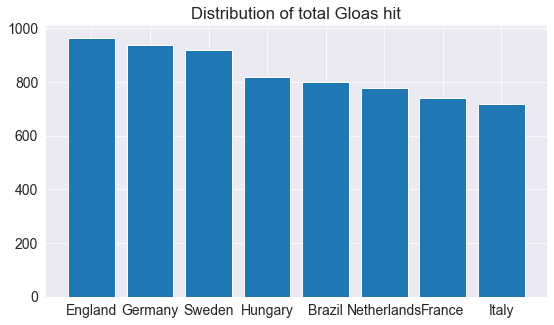

In [51]:
# How many Goals have the teams made @ Home ground

home_goals_df = win_at_home.groupby(['home_team']).sum().sort_values(by =['home_score'], ascending = False)

#also can be this: for understanding  its for each of the element of won matches
# win_at_home[win_at_home['home_team'] == 'England']['home_score'].sum()

print(home_goals_df.head(n= 10))

# Teams seems doing better in their home ground
plt.title("Distribution of total Gloas hit")
plt.bar(home_goals_df.index[:8], home_goals_df.home_score[:8]);



             home_score  away_score  neutral
away_team                                   
England           155.0       839.0        0
Germany           151.0       623.0        0
Sweden            127.0       549.0        0
Hungary           138.0       517.0        0
Brazil             87.0       441.0        0
Scotland           97.0       422.0        0
Netherlands        92.0       383.0        0
Russia             74.0       371.0        0
Argentina          91.0       370.0        0
Denmark            77.0       355.0        0


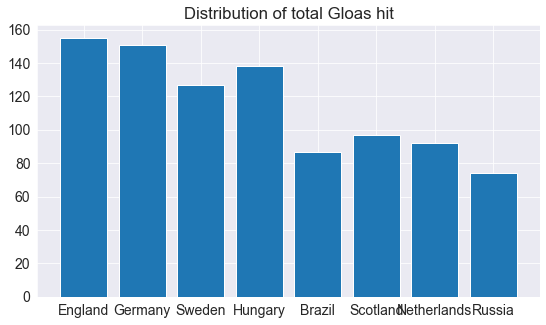

In [61]:
# How many Goals have the teams made @ non Home ground


away_goals_df = win_at_away.groupby(['away_team']).sum().sort_values(by =['away_score'], ascending = False)


print(away_goals_df.head(n= 10))

# Teams seems doing better in their home ground
plt.title("Distribution of total Gloas hit")
plt.bar(away_goals_df.index[:8], away_goals_df.home_score[:8]);


#### Concusion:

Seems like England is doing better in home ground and non home ground standing 1st on the table with
- 964 goals @ home ground and 155 at non home ground 

Followed by Germany and Sweden

In [64]:
# win %ge in home ground
home_goals_df['loose_pec'] = home_goals_df['away_score'] / (home_goals_df['home_score']+home_goals_df['away_score'])

# (home_goals_df['away_score'] / (home_goals_df['home_score']+home_goals_df['away_score']) ).sort_values(ascending = False)
home_goals_df[:20]

,home_score,away_score,neutral,loose_pec
home_team,,,,
England,964.0,160.0,0,0.142349
Germany,937.0,167.0,0,0.151268
Sweden,920.0,189.0,0,0.170424
Hungary,820.0,171.0,0,0.172553
Brazil,799.0,134.0,0,0.143623
Netherlands,777.0,133.0,0,0.146154
France,740.0,133.0,0,0.152348
Italy,718.0,121.0,0,0.144219
Denmark,701.0,133.0,0,0.159472


In [65]:
# Teams Win percentage distribution based on number of goals hit by each team
fig = go.Figure(data=[go.Pie(labels=home_goals_df.index[:20], 
                             values=home_goals_df.home_score[:20], 
                             textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(title="%ge win in home ground")
fig.show()


# fig1 = go.Figure(data=[go.Pie(labels=home_goals_df.index[:20], 
#                              values=home_goals_df.away_score[:20], 
#                              textinfo='label+percent',
#                              insidetextorientation='radial'
#                             )])
# fig1.update_layout(title="%ge of other team's win")
# fig1.show()

##### Observe a perticular team over the time 

- To say how many times the team has won.

We have Time data we can make use of it to conclude teams perfomrance over time

In [66]:
# Looking at a specific team score who played in home ground
eng_df = mask_non_neutral.loc[(mask_non_neutral['home_team'] == 'England') | (mask_non_neutral['away_team'] == 'England')]
eng_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42726,2021-09-08,Poland,England,1.0,1.0,FIFA World Cup qualification,Warsaw,Poland,False
42806,2021-10-09,Andorra,England,0.0,5.0,FIFA World Cup qualification,Andorra la Vella,Andorra,False
42875,2021-10-12,England,Hungary,1.0,1.0,FIFA World Cup qualification,London,England,False
42954,2021-11-12,England,Albania,5.0,0.0,FIFA World Cup qualification,London,England,False


In [67]:
# Next thing would be to see No. games played by the team
eng_df['tournament'].value_counts()

Friendly                        402
British Championship            254
FIFA World Cup qualification    120
UEFA Euro qualification         107
UEFA Euro                        15
UEFA Nations League              10
FIFA World Cup                    9
Rous Cup                          8
King Hassan II Tournament         1
USA Cup                           1
Tournoi de France                 1
Name: tournament, dtype: int64

In [68]:
px.histogram(eng_df['tournament'], nbins = 10)

In [69]:
px.scatter(eng_df.sort_values(by=['home_team'], ascending = True), x='date', y='home_score', hover_data= ['away_score','home_team','away_team'])

In [70]:
# Looking at a specific team score who played in neutral ground for both teams

mask_neutral = result_df.loc[result_df['neutral'] == True]
print(mask_neutral.shape)
mask_neutral.tail()

(10657, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43074,2021-12-08,Mexico,Chile,2.0,2.0,Friendly,Austin,United States,True
43076,2021-12-10,Tunisia,Oman,2.0,1.0,Arab Cup,Al Rayyan,Qatar,True
43078,2021-12-11,Egypt,Jordan,3.0,1.0,Arab Cup,Al Wakrah,Qatar,True
43079,2021-12-11,Morocco,Algeria,2.0,2.0,Arab Cup,Doha,Qatar,True
43080,2021-12-11,El Salvador,Chile,0.0,1.0,Friendly,Los Angeles,United States,True


In [71]:
eng_nu_df = mask_neutral.loc[(mask_neutral['home_team'] == 'England') | (mask_neutral['away_team'] == 'England')]
eng_nu_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3131,1950-06-25,Chile,England,0.0,2.0,FIFA World Cup,Rio de Janeiro,Brazil,True
3139,1950-06-29,England,United States,0.0,1.0,FIFA World Cup,Belo Horizonte,Brazil,True
3145,1950-07-02,England,Spain,0.0,1.0,FIFA World Cup,Rio de Janeiro,Brazil,True
3664,1954-06-17,Belgium,England,4.0,4.0,FIFA World Cup,Basel,Switzerland,True
3678,1954-06-26,England,Uruguay,2.0,4.0,FIFA World Cup,Basel,Switzerland,True
...,...,...,...,...,...,...,...,...,...
40083,2018-07-11,Croatia,England,2.0,1.0,FIFA World Cup,Moscow,Russia,True
40084,2018-07-14,Belgium,England,2.0,0.0,FIFA World Cup,St. Petersburg,Russia,True
40810,2019-06-06,England,Netherlands,1.0,3.0,UEFA Nations League,Guimaraes,Portugal,True
40872,2019-06-09,Switzerland,England,0.0,0.0,UEFA Nations League,Guimaraes,Portugal,True


In [72]:
px.scatter(eng_nu_df.sort_values(by=['home_team'], ascending = True), x='date', y='home_score', hover_data= ['away_score','home_team','away_team'])